<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 
This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [2]:
### creat a path for the dataset and read it 
sleep_path = '/Users/zerindong/Desktop/ECON628-01-zerin5577/datasets/sleep/sleep_bh.csv'

sleep = pd.read_csv(sleep_path)

In [3]:
### firstly, take a look at the dataset by browsing head and tail
sleep.head()

age  black  case  clerical  construc  educ  earns74  gdhlth  inlf  leis1  \
0   32      0     1       0.0       0.0    12        0       0     1   3529   
1   31      0     2       0.0       0.0    14     9500       1     1   2140   
2   44      0     3       0.0       0.0    17    42500       1     1   4595   
3   30      0     4       0.0       0.0    12    42500       1     1   3211   
4   64      0     5       0.0       0.0    14     2500       1     1   4052   

   ...    spwrk75  totwrk  union  worknrm  workscnd  exper  yngkid  yrsmarr  \
0  ...          0    3438      0     3438         0     14       0       13   
1  ...          0    5020      0     5020         0     11       0        0   
2  ...          1    2815      0     2815         0     21       0        0   
3  ...          1    3786      0     3786         0     12       0       12   
4  ...          1    2580      0     2580         0     44       0       33   

      hrwage  agesq  
0   7.070004   1024  
1   1.429999    961  
2  20.529997   1936  
3   9.619998    900  
4   2.750000   4096  

[5 rows x 34 columns]

In [4]:
sleep.tail()

age  black  case  clerical  construc  educ  earns74  gdhlth  inlf  leis1  \
701   45      0   702  0.182331  0.030075    12     5500       1     0   5069   
702   34      0   703  0.182331  0.030075    10     2500       0     0   5885   
703   37      0   704  0.182331  0.030075    12     3500       1     0   4719   
704   54      0   705  0.182331  0.030075    17    32500       1     0   5149   
705   30      0   706  0.182331  0.030075    16     6750       1     0   4747   

     ...    spwrk75  totwrk  union  worknrm  workscnd  exper  yngkid  yrsmarr  \
701  ...          1    2026      0     2026         0     27       0       18   
702  ...          0     675      1      465       210     18       0        4   
703  ...          1    1851      0     1851         0     19       0       17   
704  ...          1    1961      1     1481       480     31       0       22   
705  ...          0    2363      0     2363         0      8       1        9   

     hrwage  agesq  
701     NaN   2025  
702     NaN   1156  
703     NaN   1369  
704     NaN   2916  
705     NaN    900  

[5 rows x 34 columns]

In [5]:
### dataframe shape tells us the amount of the rows and columns
sleep.shape

(706, 34)

## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [6]:
### getting basic info of the dataset
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     532 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 non-null int64
union       706 non-null int64
worknrm     706 non-null int64
workscnd    706 non

In [7]:
### count the missing values
sleep.isnull().sum()

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64

From the table above, we can see that there are some observations are missing in the columns "lhrwage" and "hrwage". To clean the dataset, we need to replace them by the means. 

In [8]:
### locate the missing values, how did the missing values code in the dataset
sleep.loc[sleep['lhrwage'].isnull()].T

532          533          534           535          536  \
age         34.000000    44.000000    58.000000     29.000000    39.000000   
black        0.000000     1.000000     0.000000      0.000000     0.000000   
case       533.000000   534.000000   535.000000    536.000000   537.000000   
clerical     0.182331     0.182331     0.182331      0.182331     0.182331   
construc     0.030075     0.030075     0.030075      0.030075     0.030075   
educ        17.000000    15.000000    15.000000     16.000000    12.000000   
earns74      0.000000     0.000000     0.000000  13750.000000  9500.000000   
gdhlth       1.000000     1.000000     1.000000      1.000000     1.000000   
inlf         0.000000     0.000000     0.000000      0.000000     0.000000   
leis1     3922.000000  5635.000000  4370.000000   4672.000000  3310.000000   
leis2     3612.000000  5635.000000  4370.000000   4627.000000  3310.000000   
leis3     3612.000000  5635.000000  4370.000000   4627.000000  3310.000000   
smsa         0.000000     1.000000     0.000000      1.000000     0.000000   
lhrwage           NaN          NaN          NaN           NaN          NaN   
lothinc      0.000000    10.657280     9.839003      9.210441     8.354910   
male         1.000000     1.000000     1.000000      0.000000     1.000000   
marr         1.000000     1.000000     1.000000      1.000000     1.000000   
prot         1.000000     0.000000     1.000000      0.000000     1.000000   
rlxall    4025.000000  3450.000000  3735.000000   4140.000000  2770.000000   
selfe        1.000000     0.000000     1.000000      0.000000     0.000000   
sleep     3715.000000  3450.000000  3735.000000   4095.000000  2770.000000   
slpnaps   4025.000000  3450.000000  3735.000000   4140.000000  2770.000000   
south        0.000000     0.000000     0.000000      0.000000     0.000000   
spsepay      0.000000     0.000000     0.000000  16000.000000     0.000000   
spwrk75      0.000000     0.000000     0.000000      1.000000     0.000000   
totwrk    2443.000000   995.000000  1975.000000   1313.000000  4000.000000   
union        0.000000     0.000000     0.000000      0.000000     0.000000   
worknrm   2403.000000   995.000000  1975.000000   1313.000000  4000.000000   
workscnd    40.000000     0.000000     0.000000      0.000000     0.000000   
exper       11.000000    23.000000    37.000000      7.000000    21.000000   
yngkid       0.000000     0.000000     0.000000      0.000000     0.000000   
yrsmarr     14.000000    22.000000    29.000000      5.000000    20.000000   
hrwage            NaN          NaN          NaN           NaN          NaN   
agesq     1156.000000  1936.000000  3364.000000    841.000000  1521.000000   

                   537          538           539          540          541  \
age          41.000000    55.000000     28.000000    41.000000    46.000000   
black         0.000000     0.000000      0.000000     0.000000     0.000000   
case        538.000000   539.000000    540.000000   541.000000   542.000000   
clerical      0.182331     0.182331      0.182331     0.182331     0.182331   
construc      0.030075     0.030075      0.030075     0.030075     0.030075   
educ         17.000000    12.000000     12.000000    12.000000     8.000000   
earns74   42500.000000  9500.000000  10500.000000     0.000000  9500.000000   
gdhlth        1.000000     1.000000      1.000000     1.000000     1.000000   
inlf          0.000000     0.000000      0.000000     0.000000     0.000000   
leis1      3802.000000  5792.000000   7280.000000  3777.000000  5500.000000   
leis2      3802.000000  5792.000000   7280.000000  3777.000000  4803.000000   
leis3      3802.000000  5762.000000   7280.000000  3757.000000  4803.000000   
smsa          0.000000     0.000000      0.000000     0.000000     0.000000   
lhrwage            NaN          NaN           NaN          NaN          NaN   
lothinc       0.000000     9.371694      0.000000     9.695911     8.354910   
male          1.000000 

In [9]:
### replace the missing values by the means
sleep.lhrwage = sleep.lhrwage.fillna(np.mean(sleep.lhrwage))
sleep.hrwage = sleep.hrwage.fillna(np.mean(sleep.hrwage))

In [10]:
### check if the missing values were successfully replaced
sleep.isnull().sum()

age         0
black       0
case        0
clerical    0
construc    0
educ        0
earns74     0
gdhlth      0
inlf        0
leis1       0
leis2       0
leis3       0
smsa        0
lhrwage     0
lothinc     0
male        0
marr        0
prot        0
rlxall      0
selfe       0
sleep       0
slpnaps     0
south       0
spsepay     0
spwrk75     0
totwrk      0
union       0
worknrm     0
workscnd    0
exper       0
yngkid      0
yrsmarr     0
hrwage      0
agesq       0
dtype: int64

Data is cleaned, ready for the plotting and regression analysis.

## 3. Check for correlations
    Implement a correlation heatmap
---

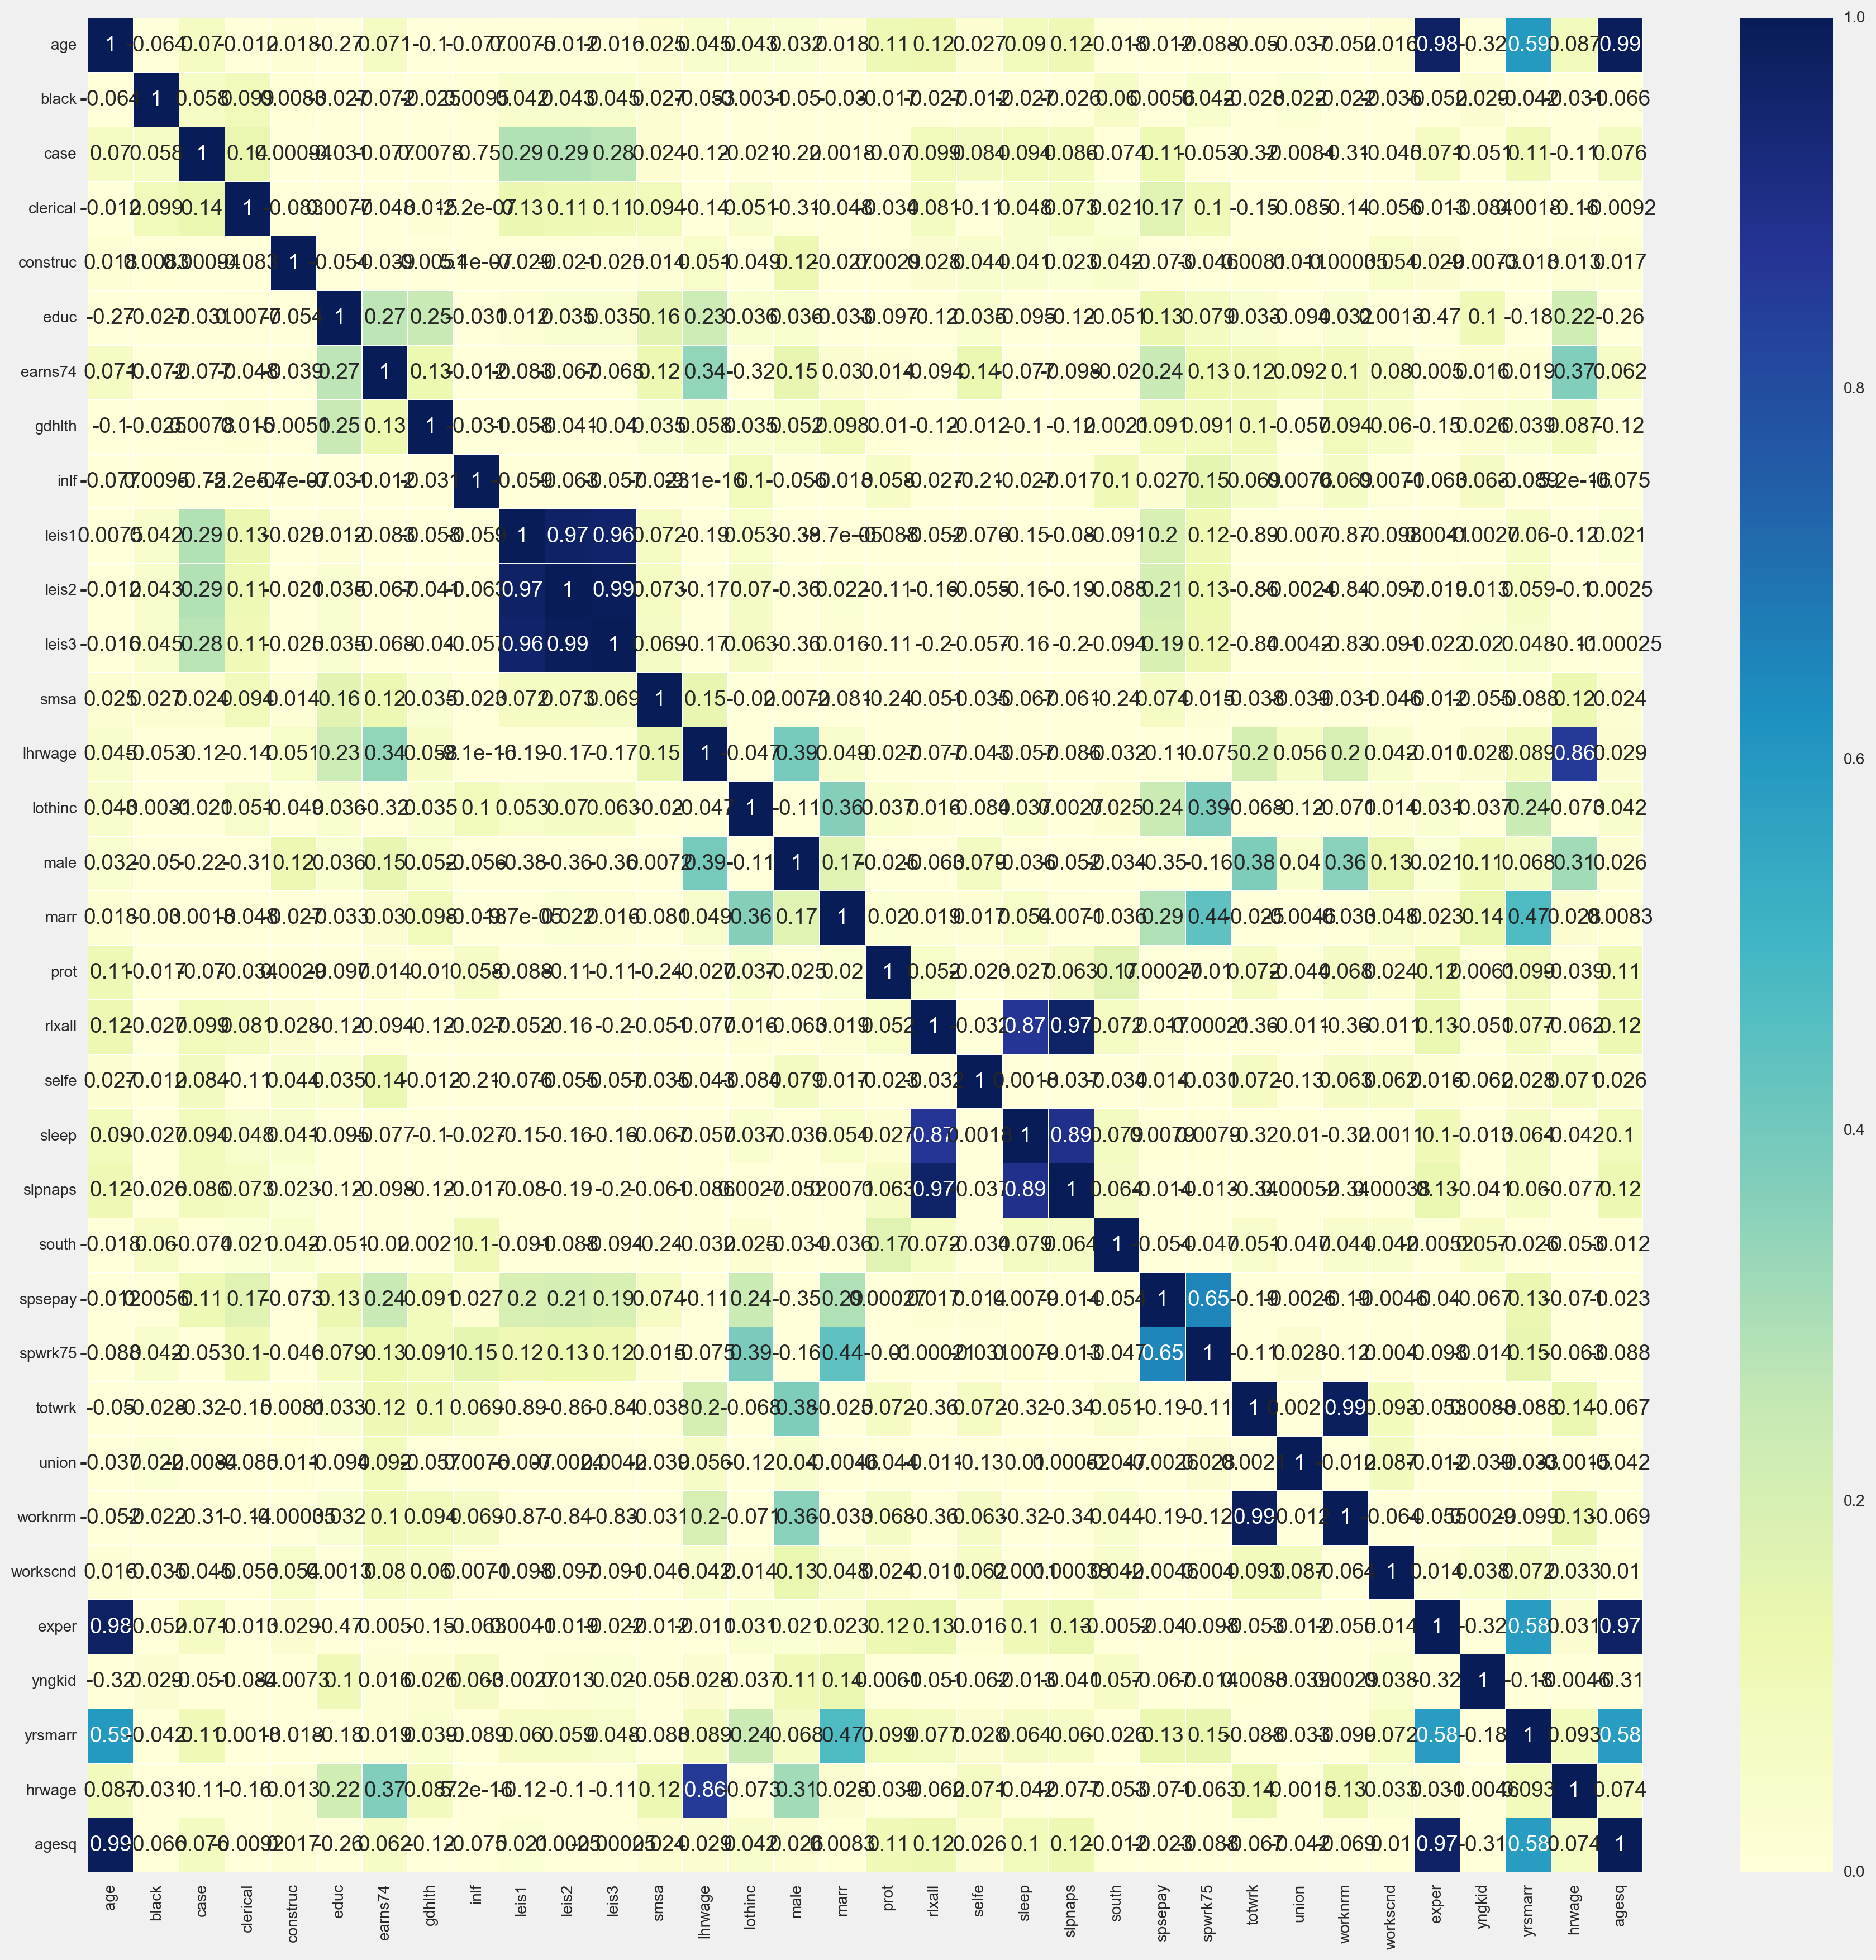

In [11]:
### code cited from lecture note, let creat a correlation heatmap for the entire dataset first
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
sns.heatmap(sleep.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

As the table shows, it's very hard to read all the correlations. Plus, not all the variables are related to this research. I've selected some variables based on the correltion and common knowledge. 

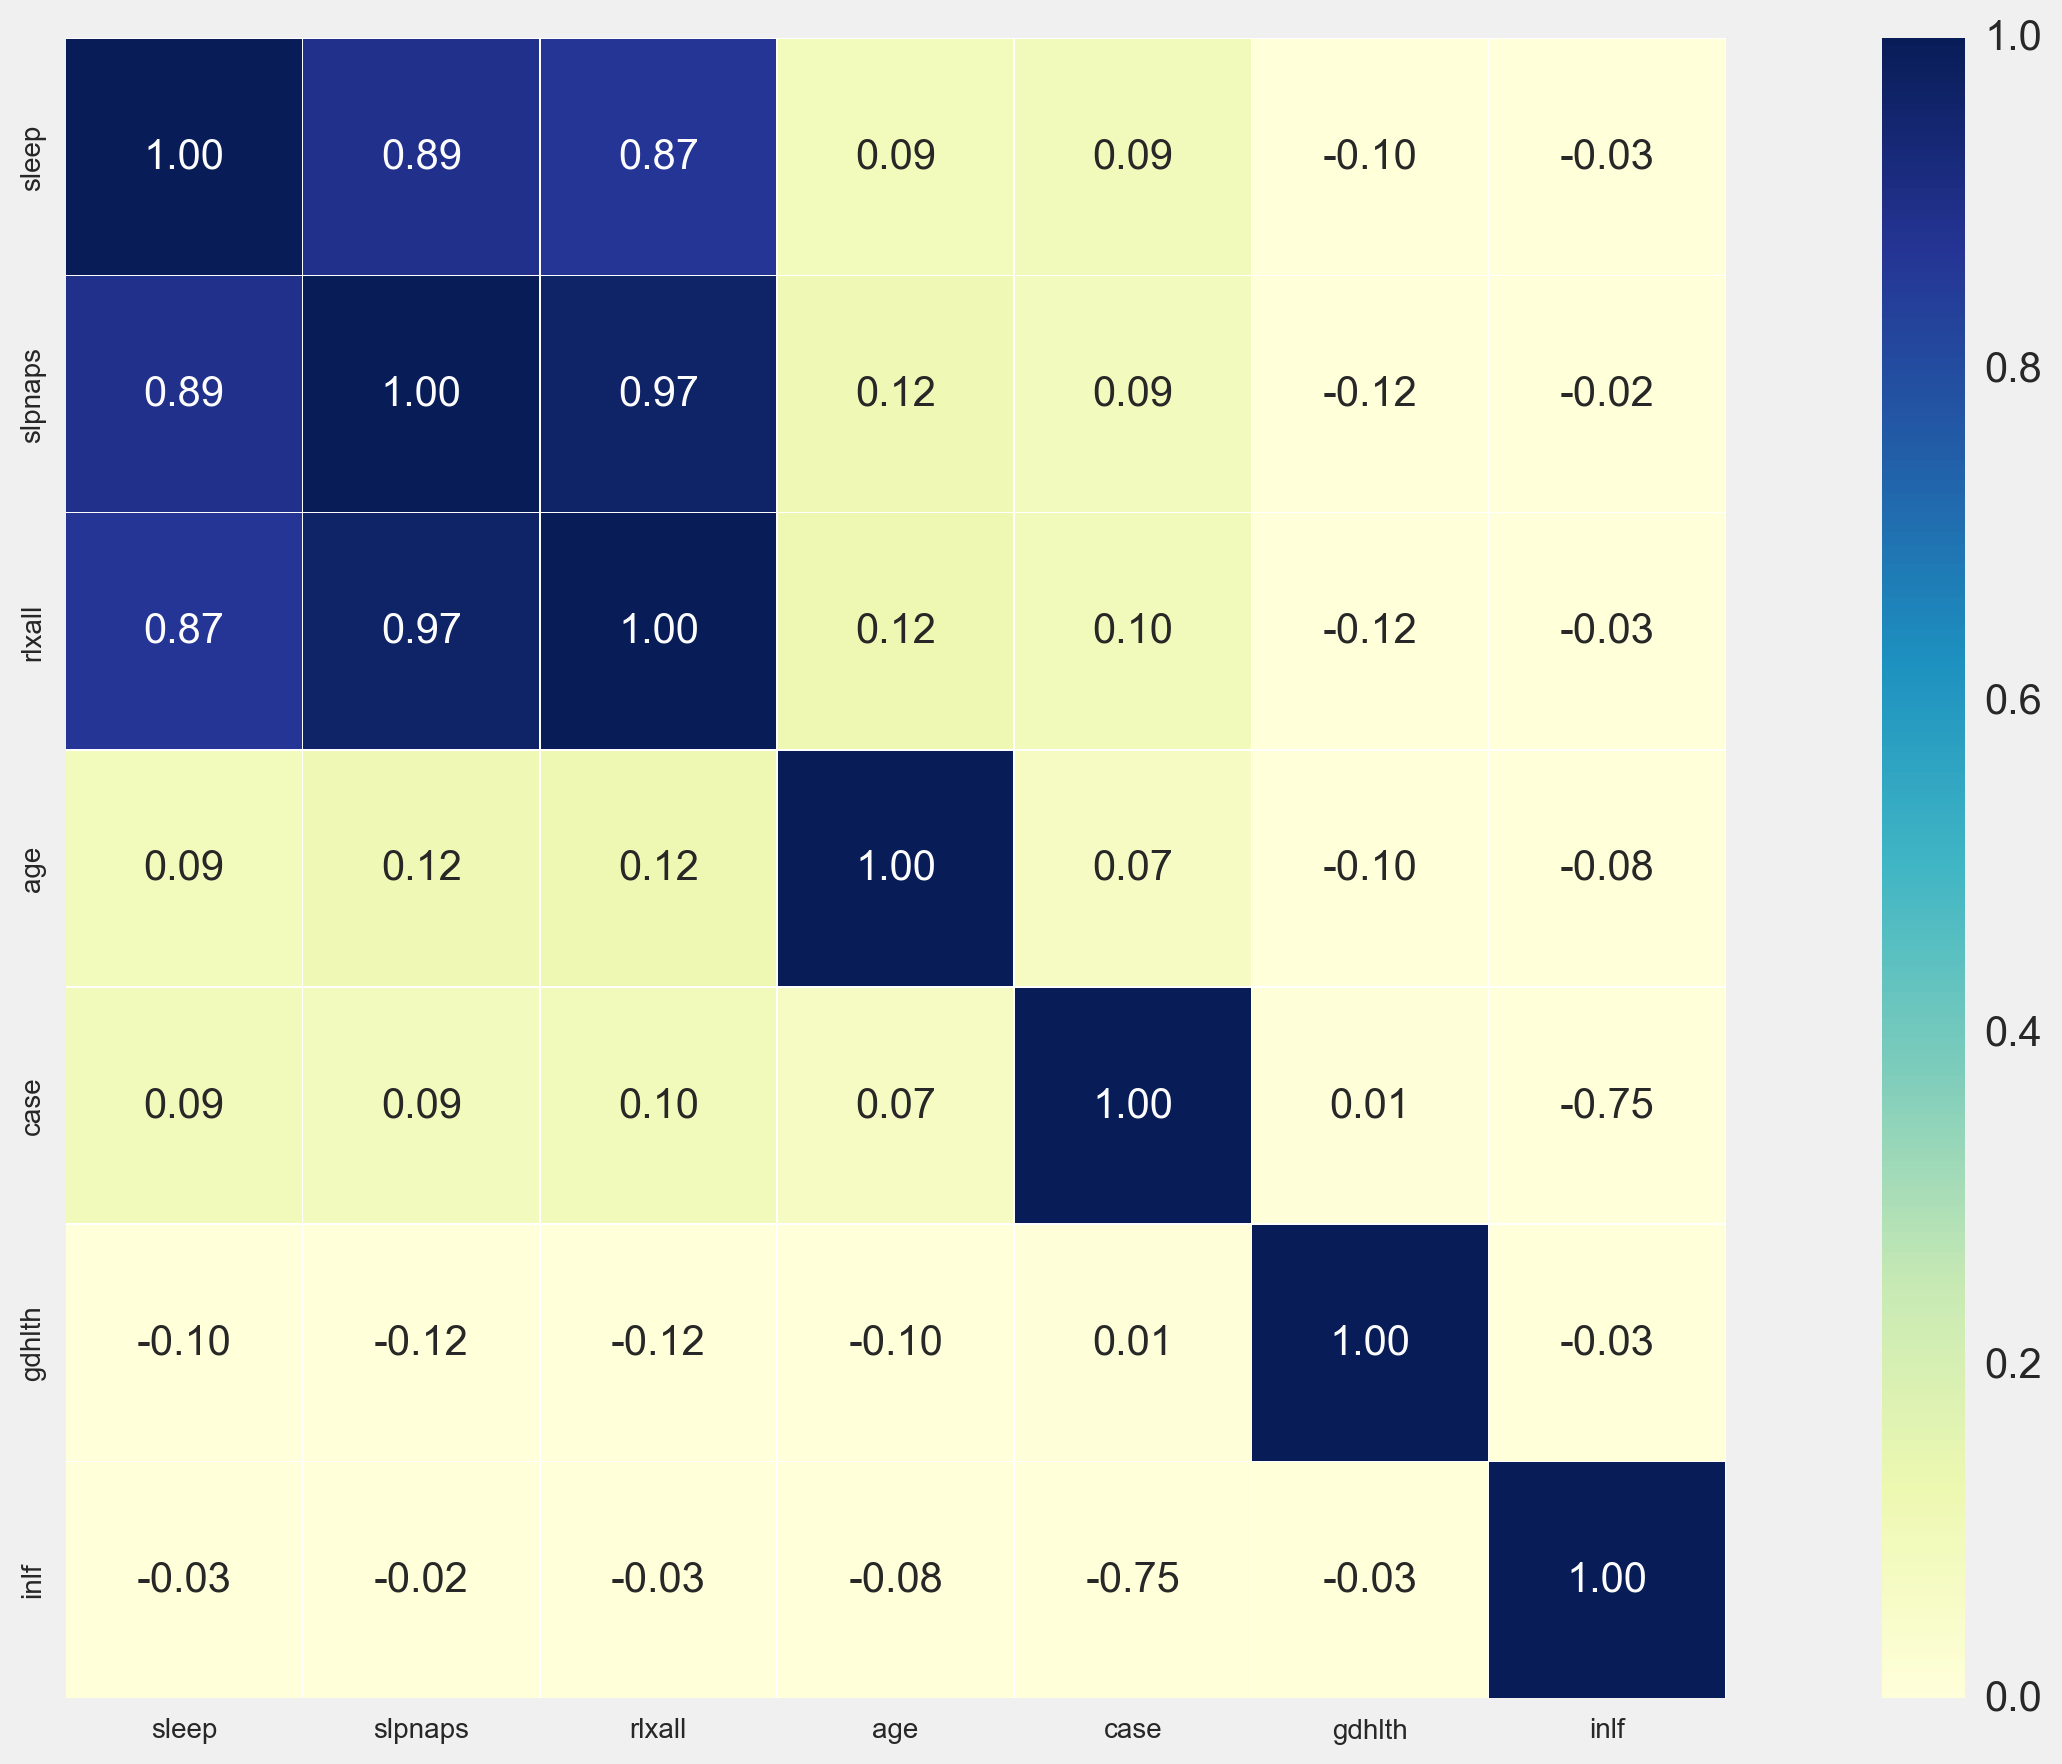

In [12]:
### heatmap for desired variables
cols = ['sleep', 'slpnaps', 'rlxall', 'age', 'case', 'gdhlth','inlf']
fig = plt.figure(figsize=(18,10))
ax = fig.gca()

cm = np.corrcoef(sleep[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 cmap="YlGnBu", 
                 vmin=0, 
                 vmax=1,
                 linewidths= .15, 
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,
                 ax=ax)
plt.show()

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [13]:
### define y and X
X = sleep[['slpnaps', 'rlxall', 'age', 'case', 'gdhlth','inlf']]
y = sleep.sleep

In [14]:
### standarize the our variables 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 

Xn = ss.fit_transform(X)

In [15]:
### recall from the leture note, seperate dataset into "test" and "train", print out the shape
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(494, 6) (212, 6)


(494,) (212,)


## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

## 4.2.1 OLS
    
---

In [16]:
### import linear regression package

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

## define a linear regression model
lr = LinearRegression()

## fit your model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
## print out the predicted values to check the proformace of OLS, cited from OLS_CV lecture note
ytrain_pred = lr.predict(X_train)
ytest_pred = lr.predict(X_test)
print(lr.coef_)
print "====\n"

## Cross validate = 10
linreg_scores = cross_val_score(lr, X_train, y_train, cv=10)

## Print the R^2
print linreg_scores
print "Average R^2 OLS score: %.3f" % (np.mean(linreg_scores))

[ 368.20413257   25.84842224   -4.30400607   20.07978898    9.47217453
   12.07060665]
====

[ 0.7692135   0.4597824   0.72531247  0.80978792  0.80642861  0.82005324
  0.8123693   0.89033022  0.76799044  0.89518247]
Average R^2 OLS score: 0.776


In [19]:
## Use the R^2 and MSE to see how the model is performing on train and test data, code from OLS_CV lecture
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE - OLS train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, ytrain_pred),
        mean_squared_error(y_test, ytest_pred)))
print('R^2 0LS train: %.3f, test: %.3f' % (
        r2_score(y_train, ytrain_pred),
        r2_score(y_test, ytest_pred)))

MSE - OLS train: 38731.812, test: 42792.784
R^2 0LS train: 0.793, test: 0.805


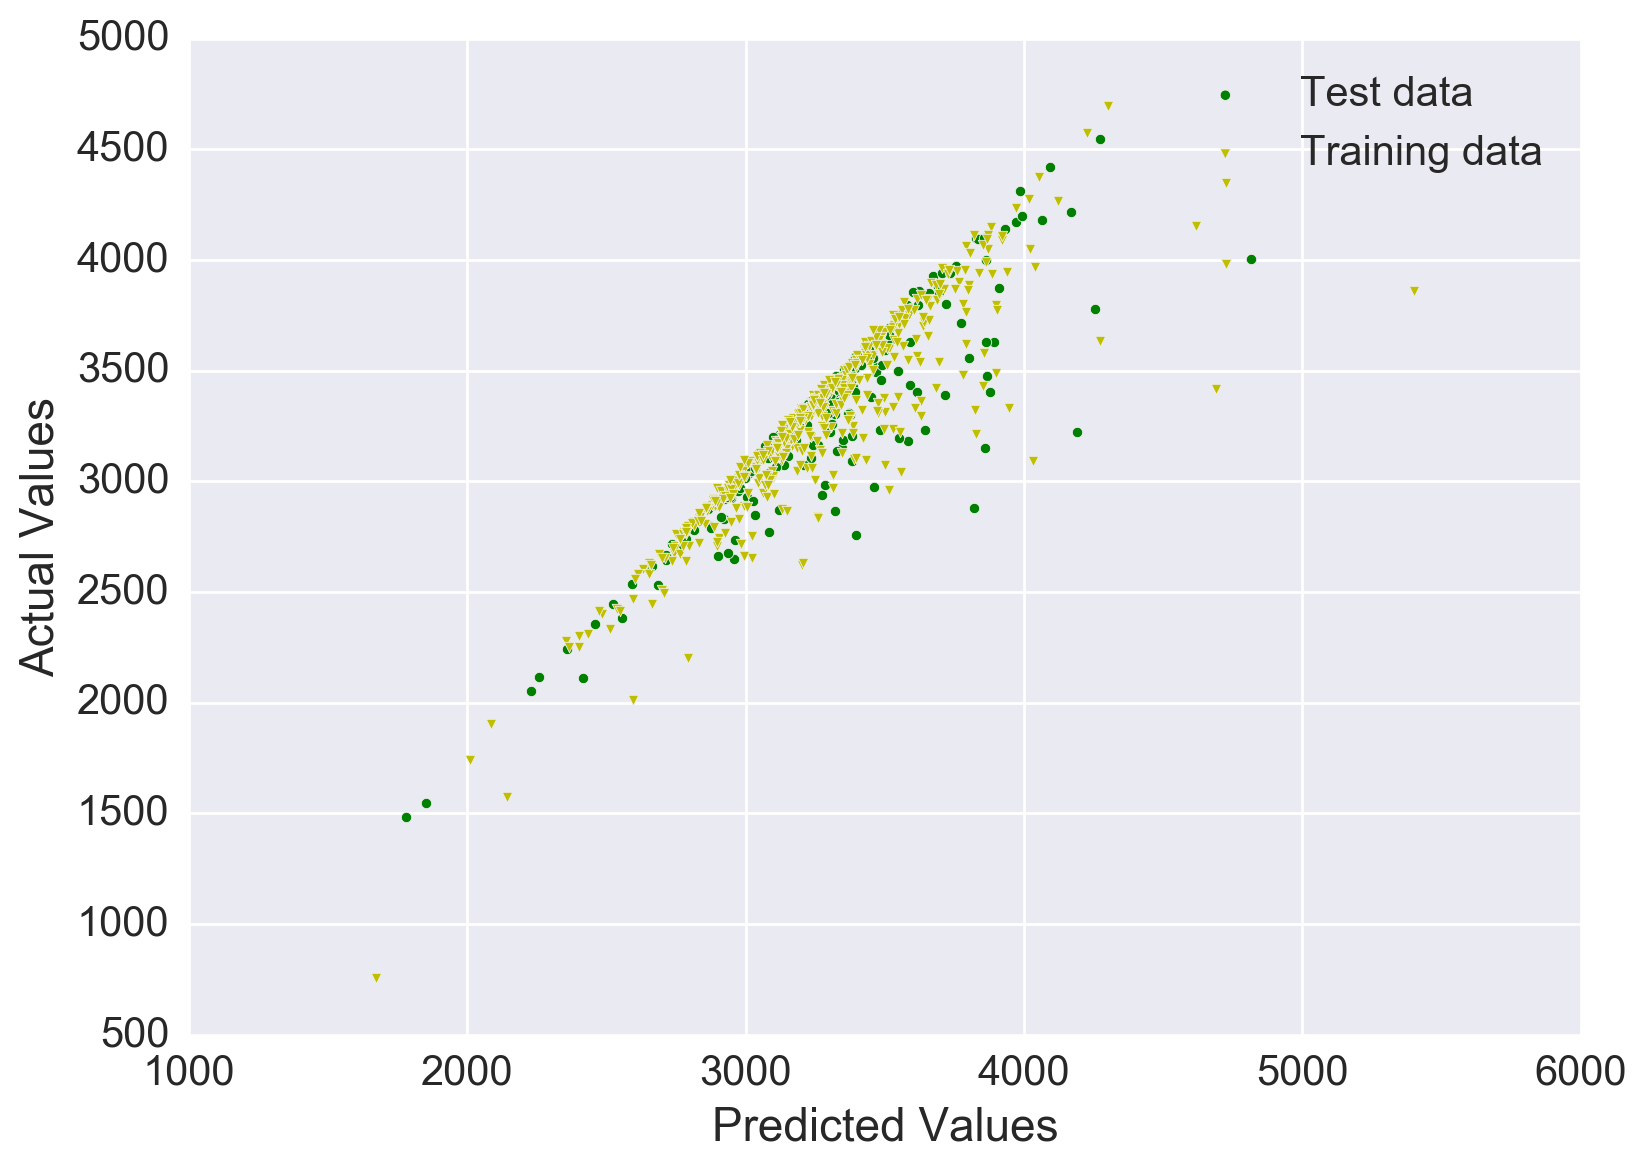

In [20]:
##  plotting the predicted values for our train and test data set
fig = plt.figure(figsize=(8,6))
plt.scatter(ytest_pred, y_test, s=14, c='g', marker='o', label='Test data')
plt.scatter(ytrain_pred, y_train, s=14, c='y', marker='v', label='Training data')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.legend(loc='upper right')
plt.show()

## 4.2.2 Regularization
    
---

In [21]:
### import the packages for regularization
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

Ridge

In [22]:
### ridge
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

2.12145178491


In [23]:
### code from OLS_CV
## Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Fit the Ridge regression
ridge.fit(X_train, y_train)
ytrain_pred_ridge = ridge.predict(X_train)
ytest_pred_ridge = ridge.predict(X_test)
print(ridge.coef_)
print "=====\n"


## Cross validate = 10
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)
## Print the R^2
print ridge_scores
print "Average R^2 Ridge score: %.3f" % (np.mean(ridge_scores))

[ 348.48581174   44.67439012   -4.37802381   20.14720814    9.17717989
   12.31305797]
=====

[ 0.76717591  0.46758134  0.72851536  0.80940225  0.80348421  0.8199568
  0.81040681  0.89036208  0.76689392  0.89441314]
Average R^2 Ridge score: 0.776


In [24]:
print('MSE - Ridge train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, ytrain_pred_ridge),
        mean_squared_error(y_test, ytest_pred_ridge)))
print('R^2 - Ridge train: %.3f, test: %.3f' % (
        r2_score(y_train, ytrain_pred_ridge),
        r2_score(y_test, ytest_pred_ridge)))

MSE - Ridge train: 38757.701, test: 42878.767
R^2 - Ridge train: 0.793, test: 0.805


Lasso

In [25]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

15.614794429


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [26]:
## Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit your regression
lasso.fit(X_train, y_train)
ytrain_pred_lasso = lasso.predict(X_train)
ytest_pred_lasso = lasso.predict(X_test)
print(lasso.coef_)
print "====\n"

lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)
print lasso_scores
print "Average R^2 Lasso score: %.3f" % (np.mean(lasso_scores))

[ 360.70245084   17.50276318   -0.            0.            0.           -0.        ]
====

[ 0.79524355  0.49868811  0.73630434  0.82261498  0.80200092  0.82257966
  0.80369399  0.87932607  0.75698522  0.888034  ]
Average R^2 Lasso score: 0.781


In [27]:
print('MSE - Lasso train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, ytrain_pred_lasso),
        mean_squared_error(y_test, ytest_pred_lasso)))
print('R^2 - Lasso train: %.3f, test: %.3f' % (
        r2_score(y_train, ytrain_pred_lasso),
        r2_score(y_test, ytest_pred_lasso)))

MSE - Lasso train: 39291.354, test: 42558.578
R^2 - Lasso train: 0.790, test: 0.806


Elastic Net

In [28]:
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5,
                            verbose=1)
optimal_enet.fit(X_train, y_train)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

19.1420048022
1.0


...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   11.0s finished


In [29]:
##  Create a model for Elastic Net
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

## Fit your model
enet.fit(X_train, y_train)

## predict
ytrain_pred_enet = enet.predict(X_train)
ytest_pred_enet = enet.predict(X_test)
print(enet.coef_)
print "=====\n"

## Cross validate the scores and print the mean of the scores
enet_scores = cross_val_score(enet, X_train, y_train, cv=10)
print enet_scores
print "Average R^2 ElasticNet score: %.3f" % (np.mean(enet_scores))

[ 358.90521353   15.54382775   -0.            0.            0.           -0.        ]
=====

[ 0.79702112  0.50522386  0.73866881  0.82388016  0.79877825  0.82043823
  0.80235781  0.87532189  0.75540336  0.88519504]
Average R^2 ElasticNet score: 0.780


In [30]:
print('MSE - ElasticNet train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, ytrain_pred_enet),
        mean_squared_error(y_test, ytest_pred_enet)))
print('R^2 - ElasticNet train: %.3f, test: %.3f' % (
        r2_score(y_train, ytrain_pred_enet),
        r2_score(y_test, ytest_pred_enet)))

MSE - ElasticNet train: 39421.793, test: 42770.675
R^2 - ElasticNet train: 0.790, test: 0.805


## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

The best features vary from model to model.
For OLS: "slpnaps","rlxall","case","gdhlth", and "inlf";
Ridge: "slpnaps","rlxall","case","gdhlth", and "inlf";
Lasso: "slpnaps" and "rlxall";
Elastic Net: "slpnaps" and "rlxall".

## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

In [31]:
## code form lecture note -- OLS_CV
# model residuals on training data:
ols_resd_train  = y_train - ytrain_pred
ridge_resd_train = y_train - ytrain_pred_ridge
lasso_resd_train = y_train - ytrain_pred_lasso
enet_resd_train = y_train - ytrain_pred_enet

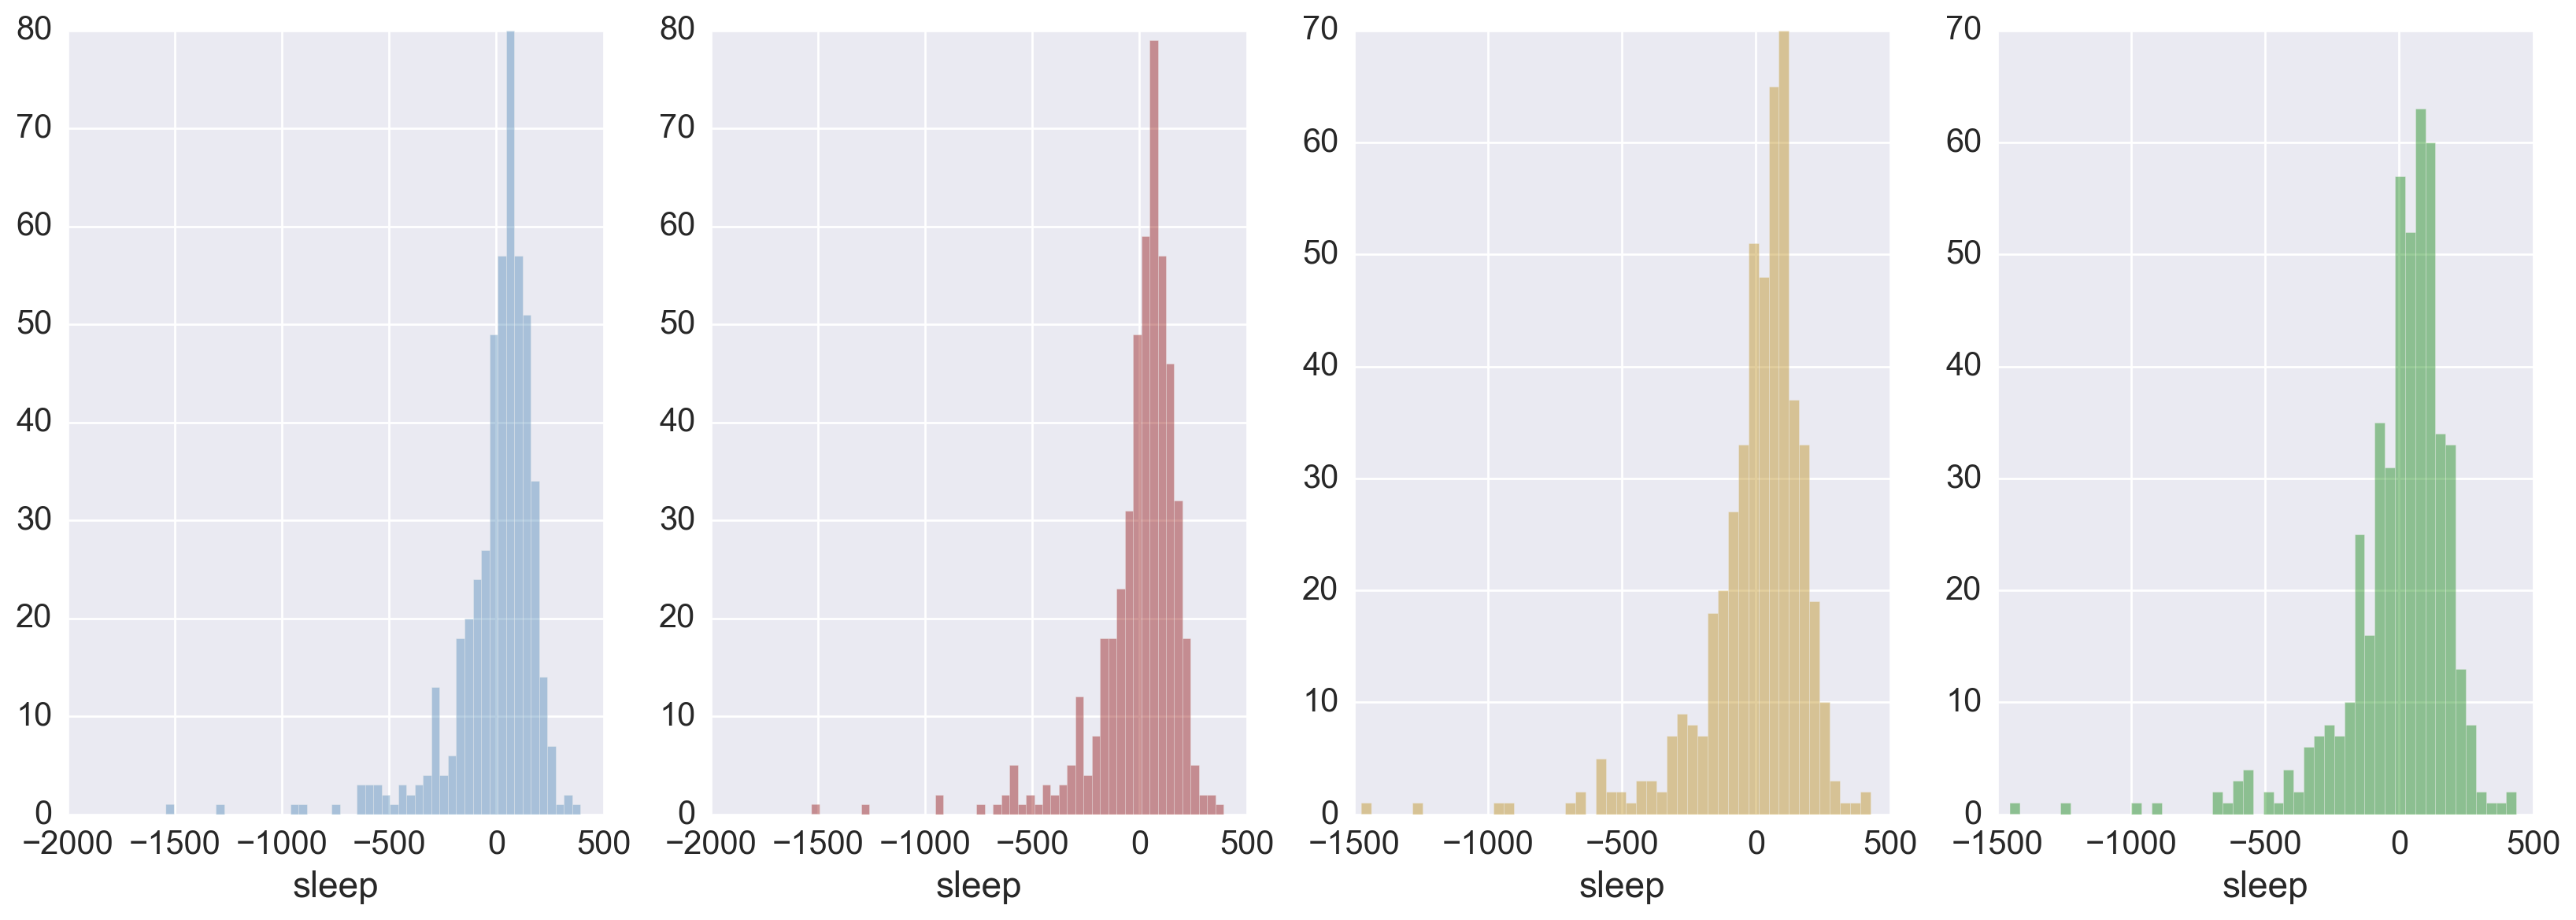

In [32]:
fig, axarr = plt.subplots(1, 4, figsize=(18, 6))

sns.distplot(ols_resd_train, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], label='OLS residuals')


sns.distplot(ridge_resd_train, bins=50, hist=True, kde=False, 
             color='darkred', ax=axarr[1], label='Ridge residuals')


sns.distplot(lasso_resd_train, bins=50, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[2], label='Lasso residuals')

sns.distplot(enet_resd_train, bins=50, hist=True, kde=False, 
             color='g', ax=axarr[3], label='ElasticNet residuals')

plt.show()


In [33]:
# model residuals on test data:
ols_resd_test  = y_test - ytest_pred
ridge_resd_test = y_test - ytest_pred_ridge
lasso_resd_test = y_test - ytest_pred_lasso
enet_resd_test = y_test - ytest_pred_enet

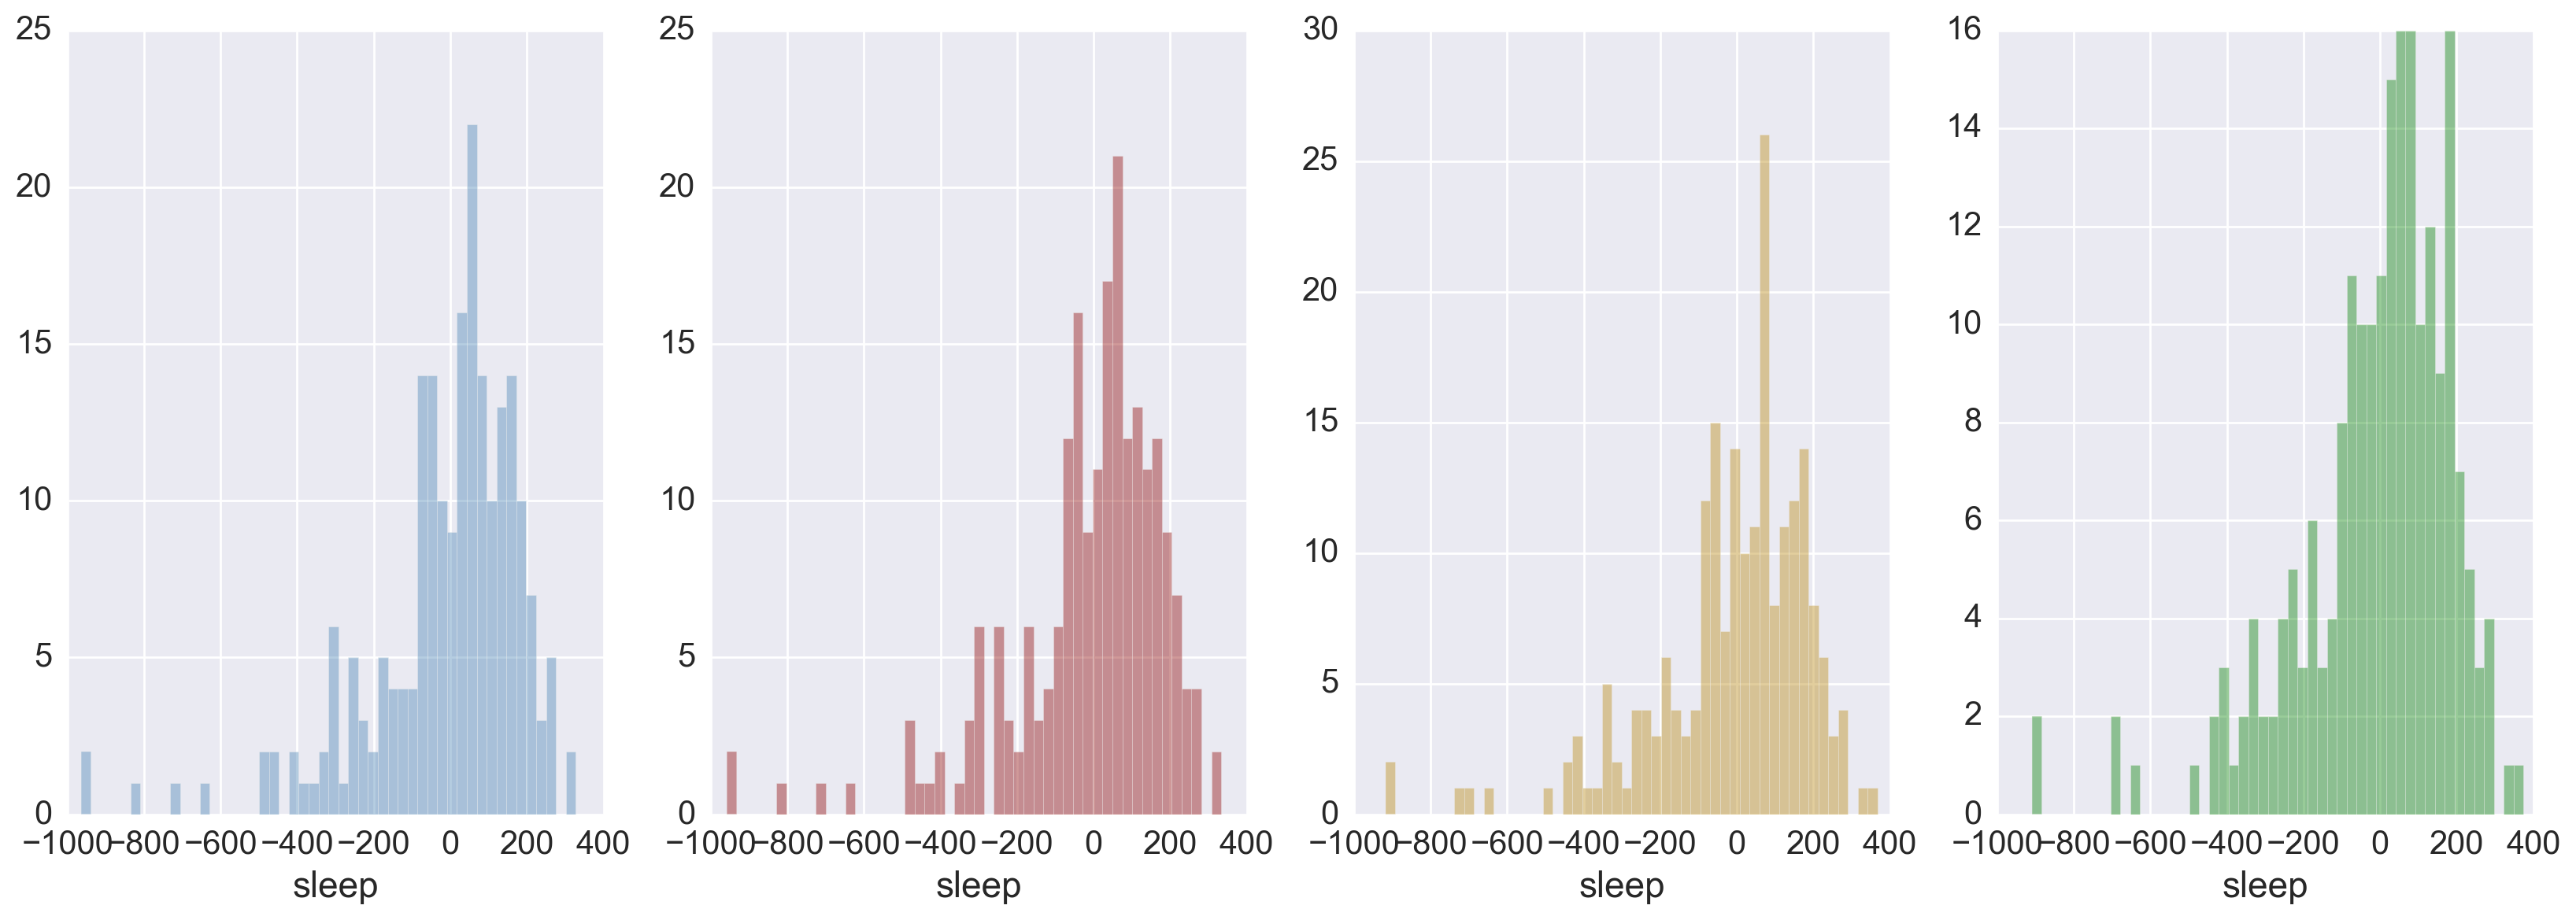

In [34]:
fig, axarr = plt.subplots(1, 4, figsize=(18, 6))

sns.distplot(ols_resd_test, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], label='OLS residuals')


sns.distplot(ridge_resd_test, bins=50, hist=True, kde=False, 
             color='darkred', ax=axarr[1], label='Ridge residuals')


sns.distplot(lasso_resd_test, bins=50, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[2], label='Lasso residuals')

sns.distplot(enet_resd_test, bins=50, hist=True, kde=False, 
             color='g', ax=axarr[3], label='ElasticNet residuals')

plt.show()

## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [35]:
### import the package
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

## crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

In [36]:
## Fit the regresion tree
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [39]:
## Print Best Estimator, parameters and score
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
           max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': 'auto', 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 5}


best score 0.797003245325


In [40]:
## Print the features that best explain your Y
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance  

In [41]:
feature_importance(X, dtr_best)

feature  importance
0  slpnaps    0.900539
1   rlxall    0.085947
3     case    0.008367
2      age    0.005147
4   gdhlth    0.000000
5     inlf    0.000000

From the table above, see can see these best features that the tree had selected for us. All six features were included in my OLS and regulization models.

In [42]:
## Predict 
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

array([ 2344.        ,  3174.94339623,  3174.94339623,  3592.96428571,
        3774.40740741,  2859.72222222,  2936.15384615,  3972.78571429,
        3174.94339623,  4358.5       ,  3470.03030303,  3186.30769231,
        3470.03030303,  3470.03030303,  2859.72222222,  2757.29166667,
        3432.        ,  3774.40740741,  3972.78571429,  2757.29166667,
        3359.27083333,  3359.27083333,  3972.78571429,  2936.15384615,
        2859.72222222,  2859.72222222,  1645.        ,  2757.29166667,
        3073.42424242,  3359.27083333,  3704.05714286,  3704.05714286,
        3174.94339623,  3774.40740741,  3774.40740741,  2537.4       ,
        3592.96428571,  3774.40740741,  3704.05714286,  3774.40740741,
        3470.03030303,  3774.40740741,  2936.15384615,  2859.72222222,
        2308.8       ,  3704.05714286,  3359.27083333,  2608.5       ,
        3293.42553191,  3470.03030303,  3174.94339623,  4358.5       ,
        3432.        ,  3073.42424242,  2936.15384615,  3774.40740741,
      

In [54]:
### cite from MEGA Lab lecture note

''' Function that calls the MSE and R^2 at once, using the name of the method and calling the best model'''

def rsquare_meansquare_error(y_tain, y_test, X_train, X_test, test, best_model):
    """ first we need to predict on the test and train data"""
    ytrain_pred = best_model.predict(X_train)
    ytest_pred = best_model.predict(X_test)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(y_train, ytrain_pred),
        mean_squared_error(y_test, ytest_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(y_train, ytrain_pred),
        r2_score(y_test, ytest_pred)))

In [55]:
## Evaluate the Regression Tree performance on your train and test data
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 22308.88, test data: 47081.87
R^2 Regression tree train data: 0.88, test data: 0.79


In [44]:
## Visualize your tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

Couldn't import dot_parser, loading of dot files will not be possible.


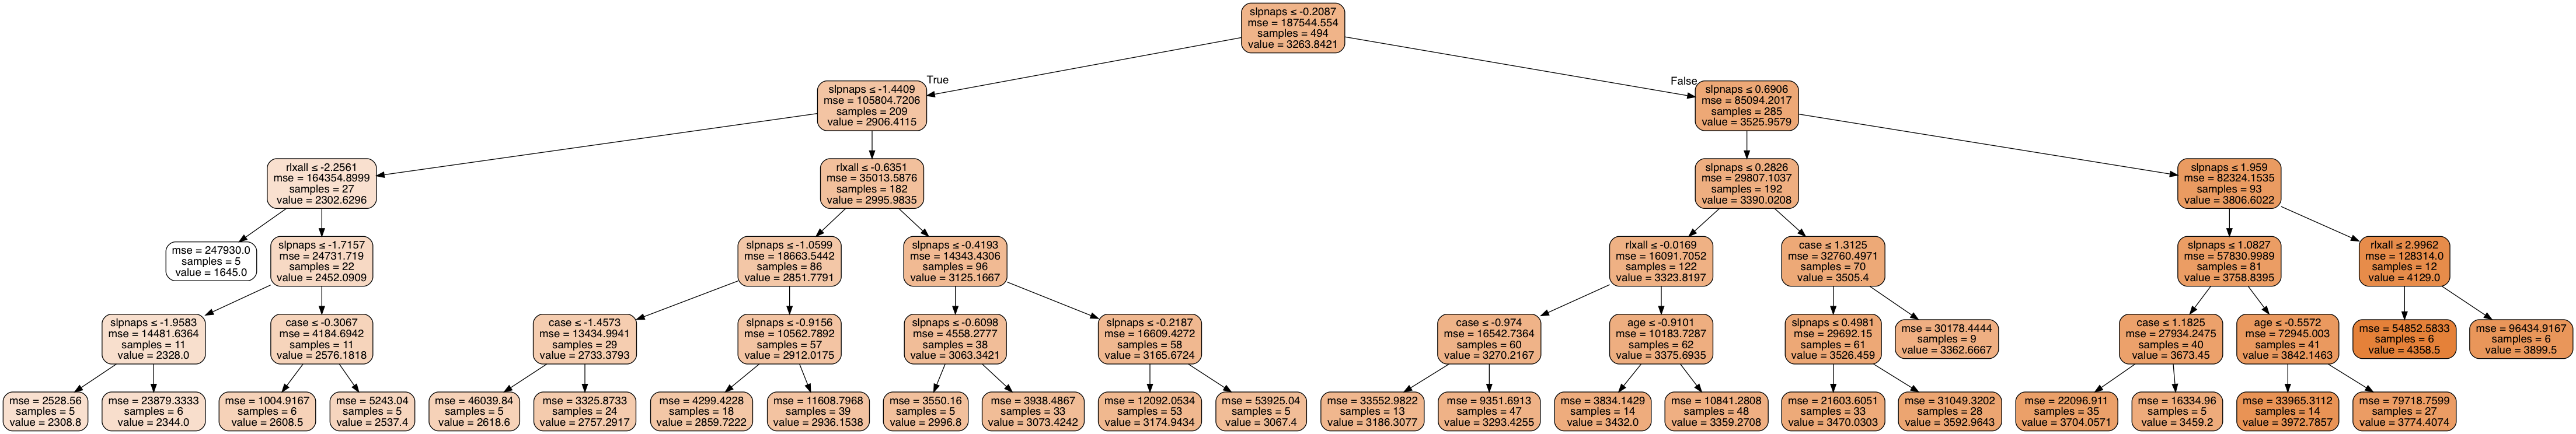

In [45]:
dot_data = StringIO()
''' dtr_best was previously defined'''

## Graph
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



In [46]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [47]:
## Fit your random forest tree
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   22.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [48]:
## Print the best estimator, parameters and score
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=7, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'min_samples_split': 3, 'max_leaf_nodes': 7, 'n_estimators': 100, 'max_depth': 4}


best score 0.822704311202


In [49]:
## Print the feauure importance
feature_importance(X, rfr_best)

feature  importance
0  slpnaps    0.937321
1   rlxall    0.059306
3     case    0.001941
2      age    0.001249
4   gdhlth    0.000184
5     inlf    0.000000

Random forest has recommonded the same selections. Again, all the features were included in the OLS and regulization models.

In [50]:
## Predict
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 2372.55127409,  3161.93411824,  3163.59961799,  3490.64274051,
        3792.38539093,  2883.49565873,  2958.96566427,  3862.9811222 ,
        3164.67438712,  4011.84061546,  3405.16974974,  3309.0707803 ,
        3395.39952521,  3474.40068989,  2891.92186765,  2746.47940426,
        3379.20000772,  3855.05585627,  3858.44307849,  2688.07266402,
        3373.9461339 ,  3381.33899762,  3884.94437915,  2923.70843102,
        2880.37538002,  2880.37538002,  1630.31827623,  2684.70748053,
        3066.18344282,  3382.74904132,  3667.7274431 ,  3663.99802215,
        3158.89299014,  3823.05933573,  3783.62163753,  2629.85911477,
        3532.07377531,  3779.49895293,  3673.80094612,  3777.64939272,
        3478.3846492 ,  3792.38539093,  2926.63960514,  2877.3410897 ,
        2372.55127409,  3673.80094612,  3384.88803122,  2587.53454288,
        3309.0707803 ,  3426.52600839,  3166.64074609,  4011.84061546,
        3312.90411293,  3083.68415115,  2936.62578362,  3854.11945893,
      

In [57]:
## Evaluate your model
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 25517.71, test data: 37966.57
R^2 Random Forest Regression tree train data: 0.86, test data: 0.83


## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

The MSE and R square are(train/test):
OLS: (38731.81/42792.78)  (0.776/0.81)
Ridge: (38757.701/4287.767)  (0.793/0.805)
Lasso: (39291.354/42558.578)  (0.790/0.806)
Elastic Net: (39421.792/42770.675)  (0.790/0.805)
Rregssion Tress: (22308.88/47081.87) (0.88/0.79)
Random Forest: (25517.71/37966.57) (0.86/0.83)

To sum up, our goal is to find optimal model for the prediction. To acheive this goal, we need to select the model that have the smallest MES and biggest R squre. In this case, Random forest would be our best choice.

## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

ANS: Yes. Regulization is desired for solving multicolinearity. Causality is de-emphasized. For regulization methods, Ridge adds additional high variance to the model, hence our model will suffer from overfitting problem; Lasso adds additional high bias to the model, lasso model suffers from underfitting; and Elatic Net adds a combination of high variance and high bias. OLS will not be able to handle the irreducible errors, however, Regulization solves this problem by introduing penalties. 

The cons of CART methods: high prob of overfitting, greedy algorithm, unstable ( small changes to the input data wiil lead some large effects on the structure of the tree), and Trees are high variance estimators.

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS: I've selected Random Forest as my optimal model. It has the smallese MSE for both train and test. The R square were very high. The model may suffer from the overfitting problem due to the high R square. Moreover, the variance of Random Forest estimators were higer, compared to the other methods.